# Automated fitting of SPEIS data from any MPT file acquired _via_ EC-lab

Load the given file in the current directory

In [1]:
%load_ext jupyternotify
from impedance import preprocessing
filename = 'Hem1_EIS_dark'
# Load data from the BioLabs MPT file
frequencies, Z = preprocessing.readBioLogic("./" + filename + ".mpt")
# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

<IPython.core.display.Javascript object>

## Measurement parameters

In [2]:
# Ask for the potential start and steps of the potential measurement
print("What was the initial potential in mV?")
pot_start = int(input())
print("What was the potential step in mV?")
pot_step = int(input())
print("What was the pH of the solution?")
pot_pH = float(input())

What was the initial potential in mV?
-400
What was the potential step in mV?
25
What was the pH of the solution?
13


In [3]:
# split dataset into individual measurements separated by the initial measurement frequeny frequencies[0]
import numpy as np
potstepnumber = np.count_nonzero(frequencies == frequencies[0])
frequencies = np.array_split(frequencies, potstepnumber)
Z = np.array_split(Z, potstepnumber)

# generate list with potentials vs. Ag/AgCl for each measurement
potentials_Ag = [(x)*pot_step+pot_start for x in range(potstepnumber)]

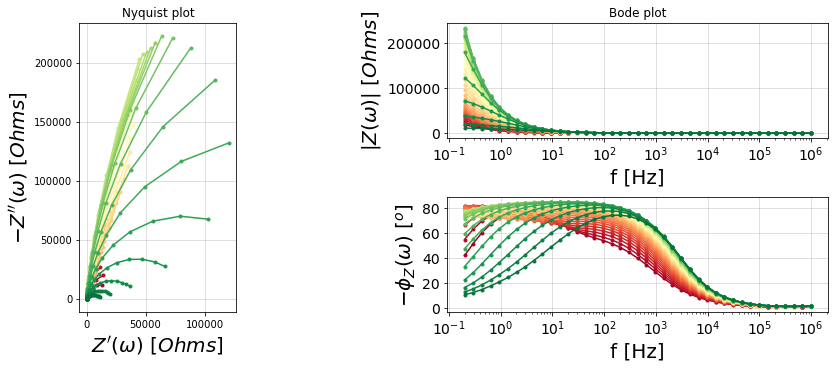

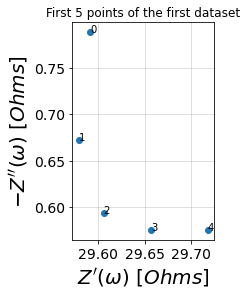

In [4]:
# Get an overview over the whole dataset
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist
import speis_plot as sp
import speis_data as sd

sp.plot_speis_overview(frequencies, Z)
plt.show()

# Number of points to investigate based on frequency range
highest_freq = 1E+5
lowest_freq = 1E+1*0.9
cutoff_start, cutoff_end = sd.get_boundaries(highest_freq, lowest_freq, frequencies)

# Plot subrange
fig, ax = plt.subplots()
plot_nyquist(ax, Z[0][:cutoff_start], fmt='o')
for i in range(cutoff_start):
    ax.annotate(i, (Z[0][i].real, -Z[0][i].imag))
plt.title("First " + str(cutoff_start) + " points of the first dataset")
plt.show()

In [5]:
#Initialize all implemented circuit models

from impedance.models.circuits import CustomCircuit

#Load Circuit with one parallel RC element
oneRC_string = 'R0-p(R1,C1)'
initial_guess_oneRC = [30, 1E+3, 1E-5]
bounds_oneRC = [[20, 1E+2, 1E-9], [50, 1E+7, 1E-2]]

oneRC = CustomCircuit(oneRC_string, initial_guess=initial_guess_oneRC)

#Load Circuit with one parallel RCPE element
oneRCPE_string = 'R0-p(R1,CPE1)'
parameters1rcpe = ["R_0", "R_1", "CPE_1-T", "CPE_1-P"]
initial_guess_oneRCPE = [30, 1E+3, 1E-5, 1]
bounds_oneRCPE = [[20, 1E+2, 1E-9, 0.8], [50, 1E+7, 1E-2, 1]]

oneRCPE = CustomCircuit(oneRCPE_string, initial_guess=initial_guess_oneRCPE)

#Load Circuit with two parallel RCPE elements
twoRCPE_string = 'R0-p(R1,CPE1)-p(R2,CPE2)'
parameters2rcpe = ["R_0", "R_1", "CPE_1-T", "CPE_1-P", "R_2", "CPE_2-T", "CPE_2-P"]
initial_guess_twoRCPE = [30, 1E+4, 1E-4, 1, 1E+2, 1E-6, 1]
bounds_twoRCPE = [[20, 1E+1, 1E-9, 0.8, 1E+0, 1E-9, 0.4], [50, 1E+7, 1E-2, 1, 1E+6, 1E-2, 1]]

twoRCPE = CustomCircuit(twoRCPE_string, initial_guess=initial_guess_twoRCPE)

## Selection of cycles to analyze

In [6]:
# from impedance.visualization import plot_altair
# import altair as alt

# dicts = {}
# for step in range(0,potstepnumber):
#     dicts[str(step*pot_step+pot_start) + "mV"] = {'f': frequencies[step], 'Z': Z[step]}
# plot_altair(dicts)

In [7]:
print("There are " + str(potstepnumber) + " cycles in total.")
print("With which cycle number do you want to start your analysis?")
cycle_start = int(input())-1
print("With which cycle number do you want to end your analysis?")
cycle_end = int(input())-1

There are 41 cycles in total.
With which cycle number do you want to start your analysis?
6
With which cycle number do you want to end your analysis?
41


## Selection of fitting model

In [8]:
print("Which model do you want to use? (1RC, 1RCPE or 2RCPE)")
model = input()

if model == "1RC":
    results = [initial_guess_oneRC]
    model_circuit_bounds = bounds_oneRC
    model_circuit = oneRC
elif model == "1RCPE":
    results = [initial_guess_oneRCPE]
    model_circuit = oneRCPE
    model_circuit_bounds = bounds_oneRCPE
elif model == "2RCPE":
    results = [initial_guess_twoRCPE]
    model_circuit = twoRCPE
    model_circuit_bounds = bounds_twoRCPE
else:
    print("Eingabe ungültig")

Which model do you want to use? (1RC, 1RCPE or 2RCPE)
1RCPE


<IPython.core.display.Javascript object>

Result of Cycle 5:


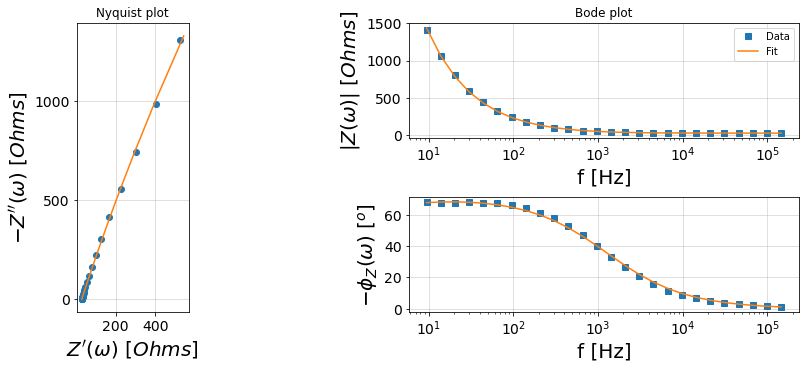


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 2.91e+01  (+/- 1.54e+00) [Ohm]
     R1 = 2.44e+04  (+/- 4.16e+03) [Ohm]
  CPE1_0 = 2.62e-05  (+/- 6.47e-07) [Ohm^-1 sec^a]
  CPE1_1 = 8.00e-01  (+/- 4.97e-03) []

Fitting error of parameter R1 at 17.0%


Result of Cycle 6:


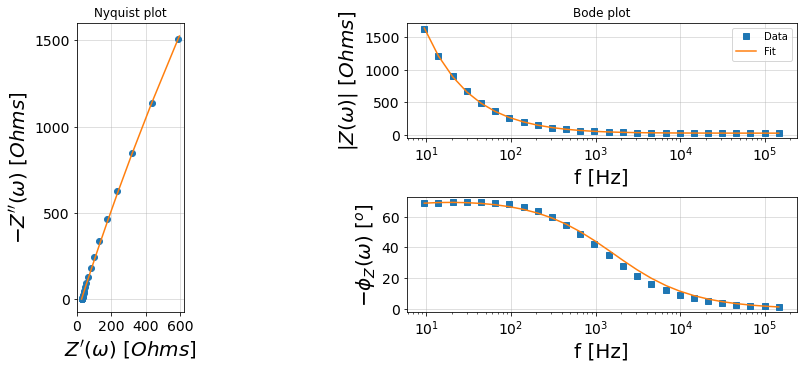


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 2.67e+01  (+/- 1.23e+00) [Ohm]
     R1 = 3.24e+04  (+/- 4.49e+03) [Ohm]
  CPE1_0 = 2.26e-05  (+/- 3.91e-07) [Ohm^-1 sec^a]
  CPE1_1 = 8.04e-01  (+/- 3.49e-03) []

Fitting error of parameter R1 at 13.9%


Result of Cycle 7:


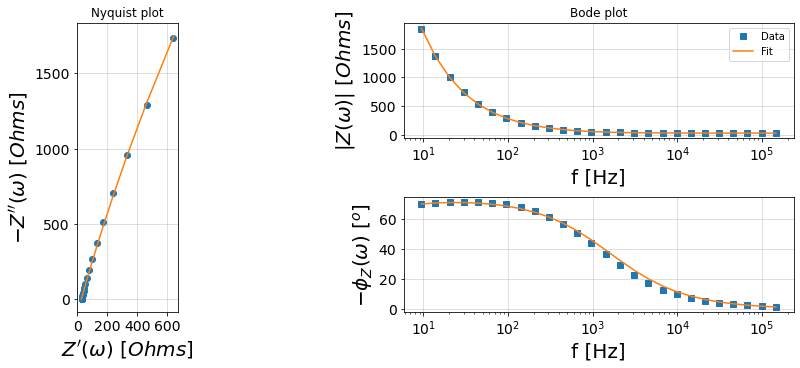


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 2.74e+01  (+/- 1.04e+00) [Ohm]
     R1 = 2.83e+04  (+/- 2.23e+03) [Ohm]
  CPE1_0 = 1.82e-05  (+/- 2.33e-07) [Ohm^-1 sec^a]
  CPE1_1 = 8.25e-01  (+/- 2.62e-03) []



Result of Cycle 8:


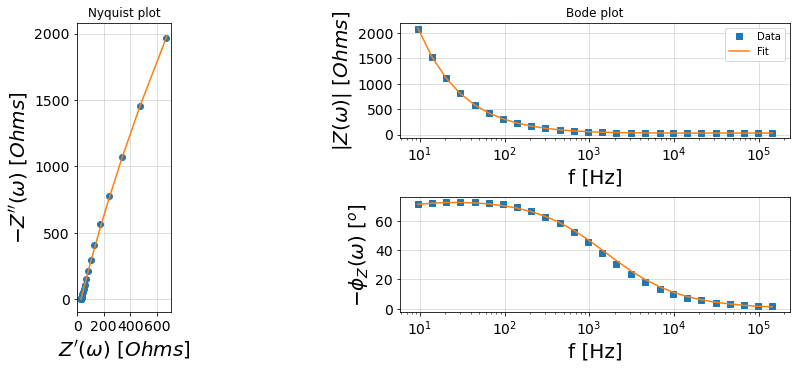


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 2.81e+01  (+/- 9.04e-01) [Ohm]
     R1 = 2.87e+04  (+/- 1.59e+03) [Ohm]
  CPE1_0 = 1.50e-05  (+/- 1.49e-07) [Ohm^-1 sec^a]
  CPE1_1 = 8.44e-01  (+/- 2.05e-03) []



Result of Cycle 9:


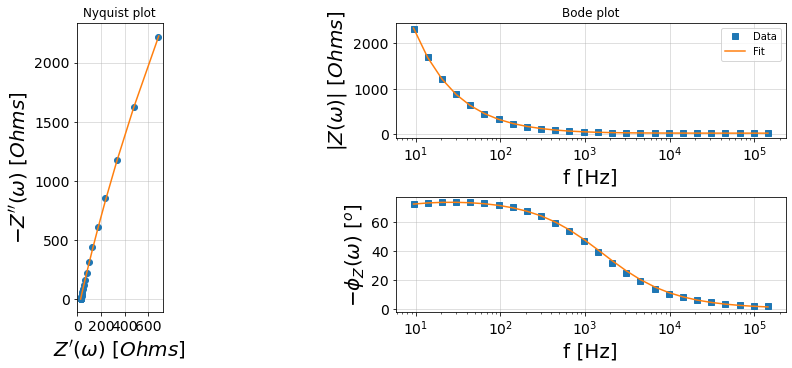


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 2.88e+01  (+/- 7.12e-01) [Ohm]
     R1 = 3.40e+04  (+/- 1.42e+03) [Ohm]
  CPE1_0 = 1.27e-05  (+/- 8.94e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.58e-01  (+/- 1.46e-03) []



Result of Cycle 10:


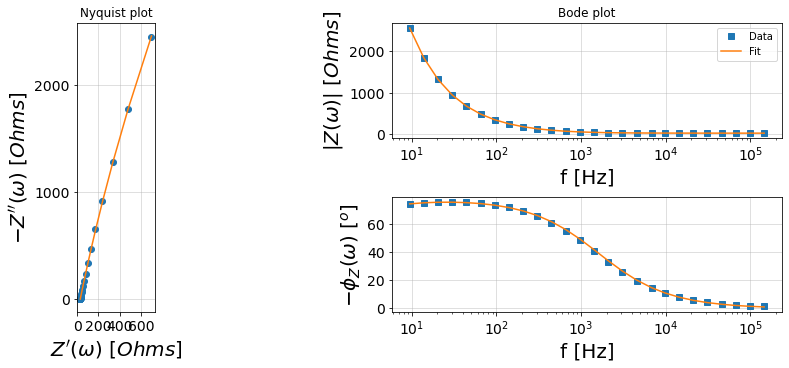


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 2.94e+01  (+/- 5.29e-01) [Ohm]
     R1 = 3.96e+04  (+/- 1.19e+03) [Ohm]
  CPE1_0 = 1.10e-05  (+/- 5.22e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.72e-01  (+/- 9.97e-04) []



Result of Cycle 11:


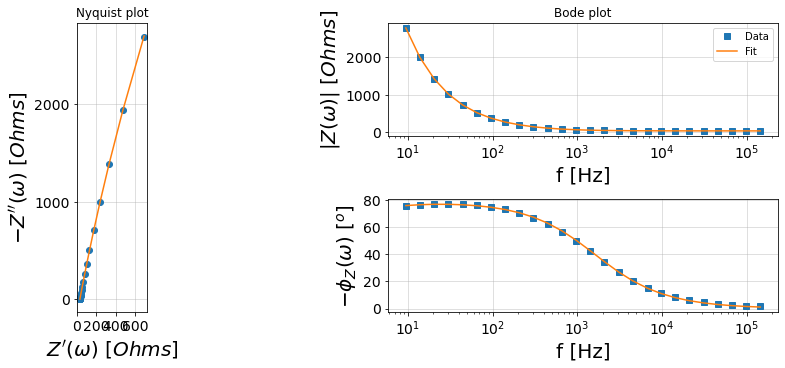


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.00e+01  (+/- 3.64e-01) [Ohm]
     R1 = 5.01e+04  (+/- 1.10e+03) [Ohm]
  CPE1_0 = 9.66e-06  (+/- 2.90e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.82e-01  (+/- 6.33e-04) []



Result of Cycle 12:


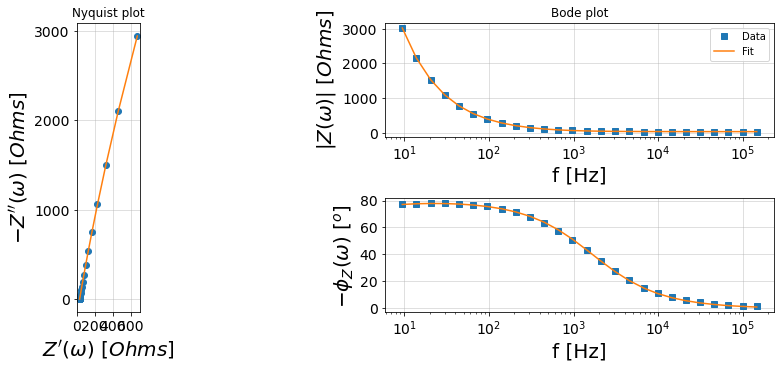


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.04e+01  (+/- 2.92e-01) [Ohm]
     R1 = 6.52e+04  (+/- 1.29e+03) [Ohm]
  CPE1_0 = 8.62e-06  (+/- 1.93e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.92e-01  (+/- 4.72e-04) []



Result of Cycle 13:


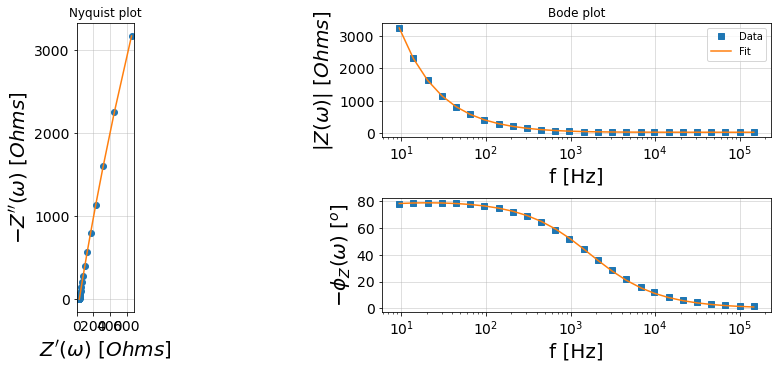


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.06e+01  (+/- 2.45e-01) [Ohm]
     R1 = 8.71e+04  (+/- 1.68e+03) [Ohm]
  CPE1_0 = 7.82e-06  (+/- 1.37e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.99e-01  (+/- 3.71e-04) []



Result of Cycle 14:


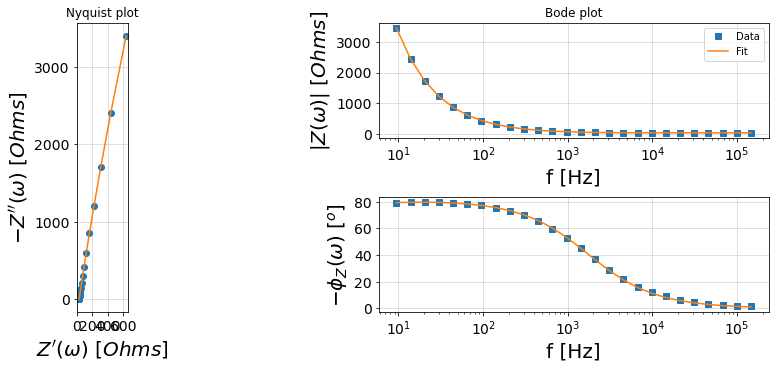


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.09e+01  (+/- 1.62e-01) [Ohm]
     R1 = 1.21e+05  (+/- 1.88e+03) [Ohm]
  CPE1_0 = 7.15e-06  (+/- 7.73e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.05e-01  (+/- 2.30e-04) []



Result of Cycle 15:


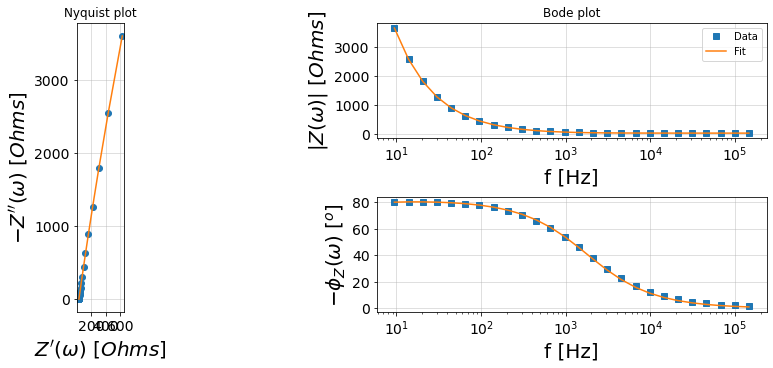


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.12e+01  (+/- 1.63e-01) [Ohm]
     R1 = 1.49e+05  (+/- 2.56e+03) [Ohm]
  CPE1_0 = 6.58e-06  (+/- 6.76e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.12e-01  (+/- 2.19e-04) []



Result of Cycle 16:


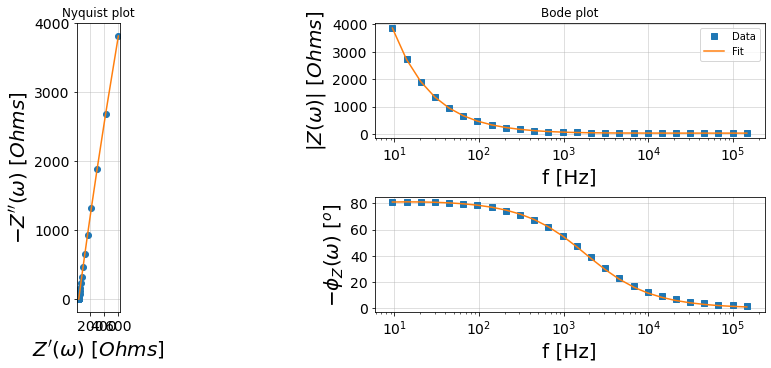


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.12e+01  (+/- 1.99e-01) [Ohm]
     R1 = 2.14e+05  (+/- 5.82e+03) [Ohm]
  CPE1_0 = 6.12e-06  (+/- 7.29e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.16e-01  (+/- 2.55e-04) []



Result of Cycle 17:


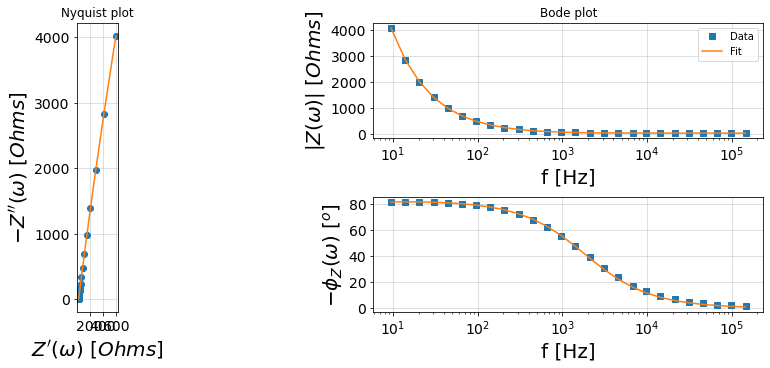


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.15e+01  (+/- 1.88e-01) [Ohm]
     R1 = 2.37e+05  (+/- 6.08e+03) [Ohm]
  CPE1_0 = 5.70e-06  (+/- 6.09e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.21e-01  (+/- 2.29e-04) []



Result of Cycle 18:


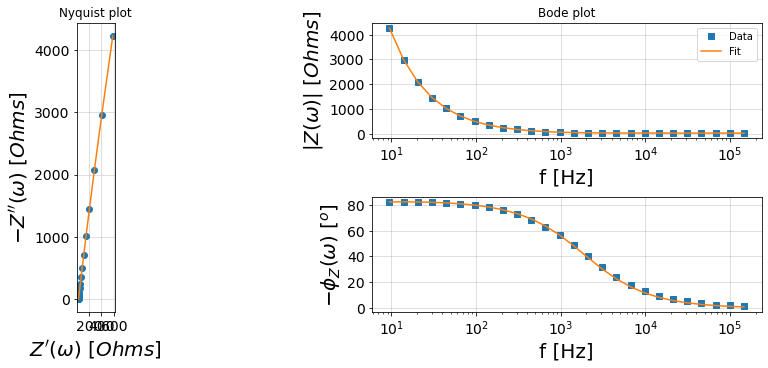


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.17e+01  (+/- 2.21e-01) [Ohm]
     R1 = 3.07e+05  (+/- 1.09e+04) [Ohm]
  CPE1_0 = 5.33e-06  (+/- 6.35e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.26e-01  (+/- 2.56e-04) []



Result of Cycle 19:


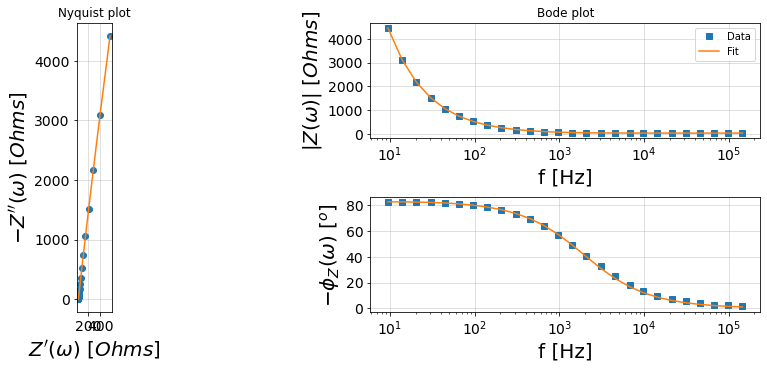


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.17e+01  (+/- 2.18e-01) [Ohm]
     R1 = 4.88e+05  (+/- 2.49e+04) [Ohm]
  CPE1_0 = 5.04e-06  (+/- 5.67e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.30e-01  (+/- 2.43e-04) []



Result of Cycle 20:


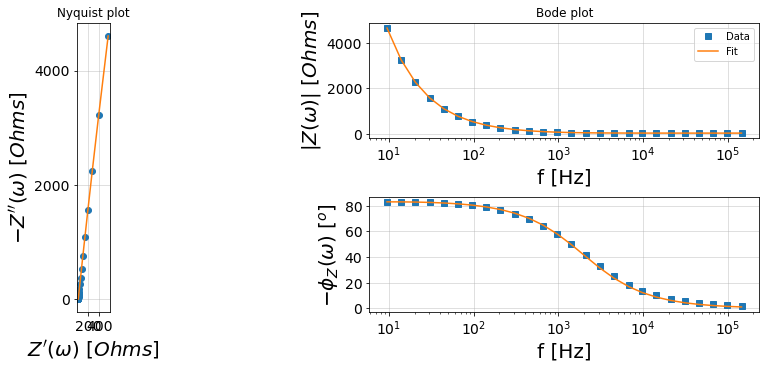


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.18e+01  (+/- 2.33e-01) [Ohm]
     R1 = 5.38e+05  (+/- 3.00e+04) [Ohm]
  CPE1_0 = 4.76e-06  (+/- 5.52e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.33e-01  (+/- 2.50e-04) []



Result of Cycle 21:


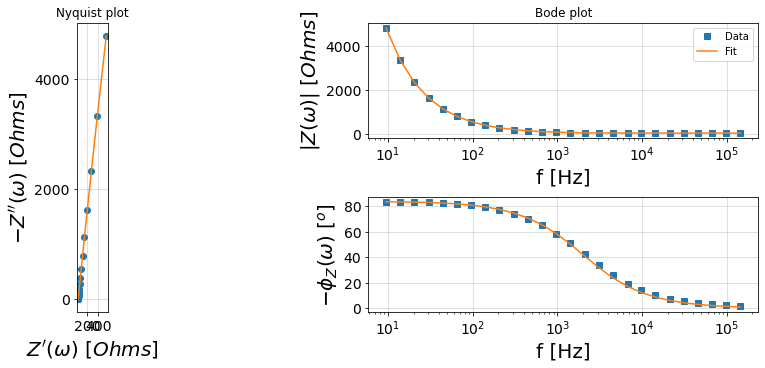


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.20e+01  (+/- 2.54e-01) [Ohm]
     R1 = 6.84e+05  (+/- 4.88e+04) [Ohm]
  CPE1_0 = 4.52e-06  (+/- 5.48e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.37e-01  (+/- 2.62e-04) []



Result of Cycle 22:


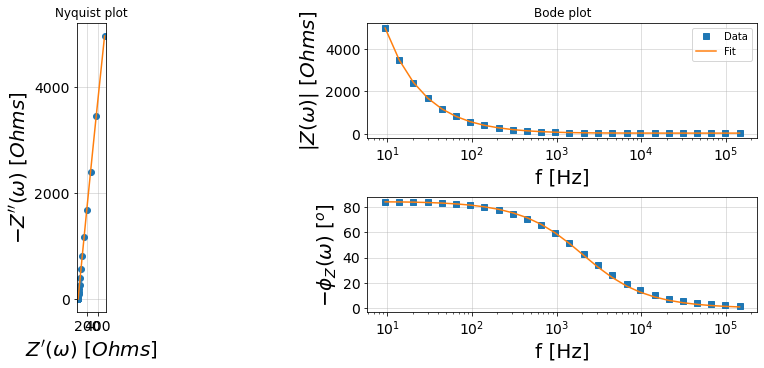


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.20e+01  (+/- 2.43e-01) [Ohm]
     R1 = 9.31e+05  (+/- 1.55e-07) [Ohm]
  CPE1_0 = 4.31e-06  (+/- 2.17e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.40e-01  (+/- 1.08e-04) []



Result of Cycle 23:


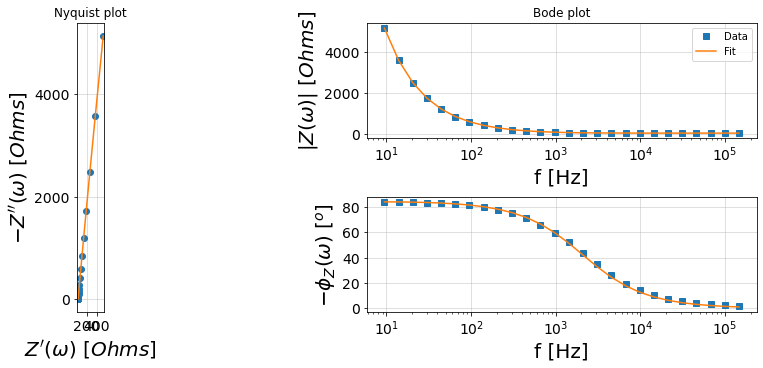


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.22e+01  (+/- 2.72e-01) [Ohm]
     R1 = 1.02e+06  (+/- 1.53e-07) [Ohm]
  CPE1_0 = 4.12e-06  (+/- 2.24e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.43e-01  (+/- 1.16e-04) []



Result of Cycle 24:


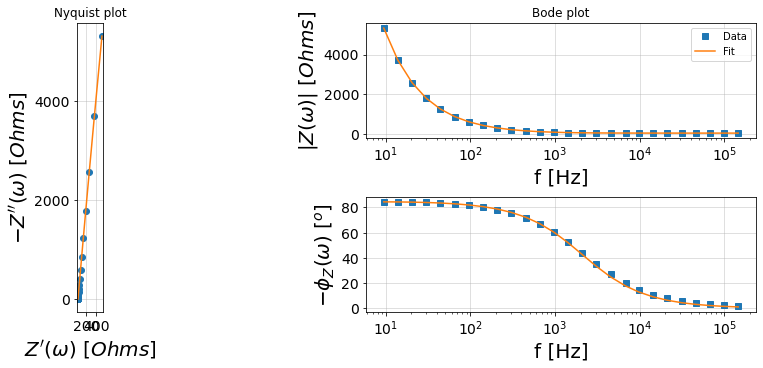


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.23e+01  (+/- 2.97e-01) [Ohm]
     R1 = 1.06e+06  (+/- 1.63e-07) [Ohm]
  CPE1_0 = 3.94e-06  (+/- 2.28e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.45e-01  (+/- 1.24e-04) []



Result of Cycle 25:


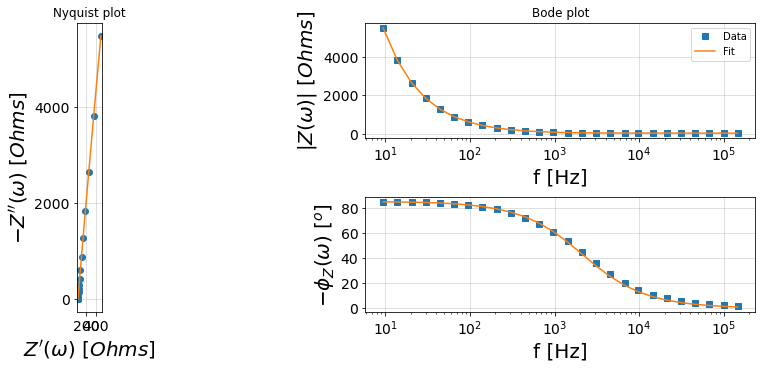


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.22e+01  (+/- 2.68e-01) [Ohm]
     R1 = 1.38e+06  (+/- 9.03e-08) [Ohm]
  CPE1_0 = 3.80e-06  (+/- 1.93e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.47e-01  (+/- 1.08e-04) []



Result of Cycle 26:


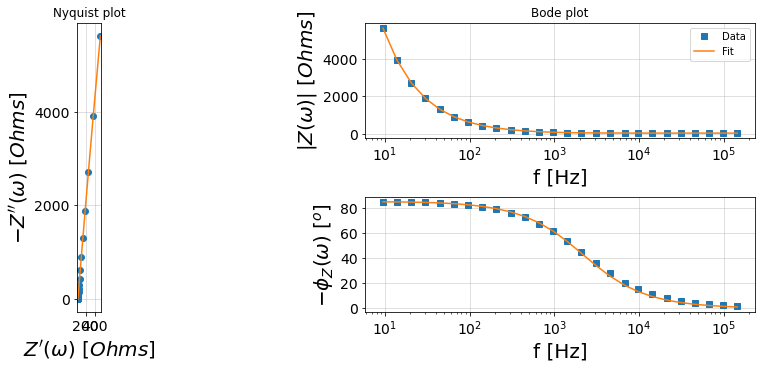


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.22e+01  (+/- 2.74e-01) [Ohm]
     R1 = 1.12e+06  (+/- 1.48e-07) [Ohm]
  CPE1_0 = 3.67e-06  (+/- 1.85e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.49e-01  (+/- 1.08e-04) []



Result of Cycle 27:


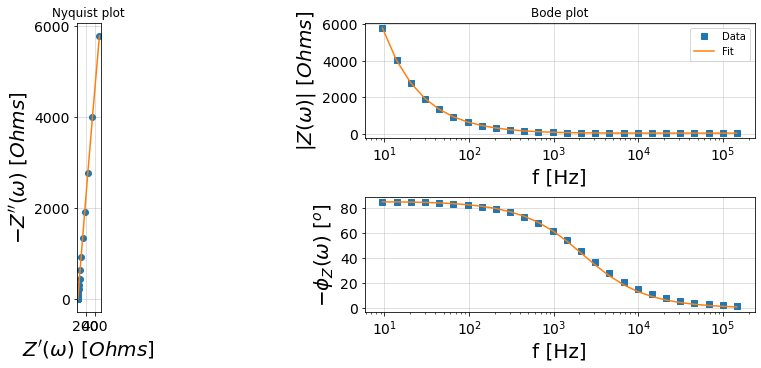


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.23e+01  (+/- 2.90e-01) [Ohm]
     R1 = 1.09e+06  (+/- 1.73e-07) [Ohm]
  CPE1_0 = 3.54e-06  (+/- 1.84e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.51e-01  (+/- 1.11e-04) []



Result of Cycle 28:


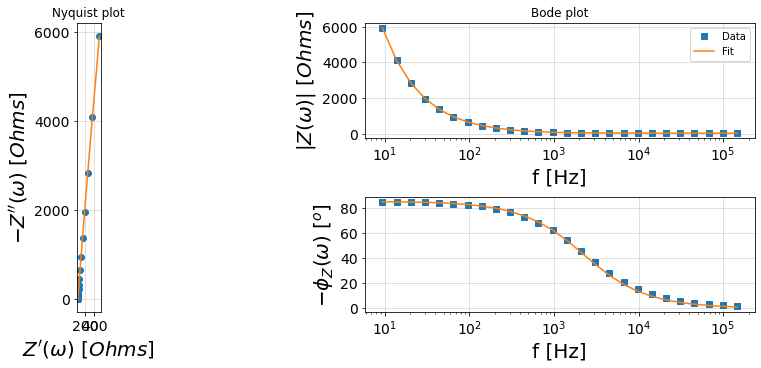


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.22e+01  (+/- 2.79e-01) [Ohm]
     R1 = 8.35e+05  (+/- 2.93e-07) [Ohm]
  CPE1_0 = 3.44e-06  (+/- 1.68e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.52e-01  (+/- 1.04e-04) []



Result of Cycle 29:


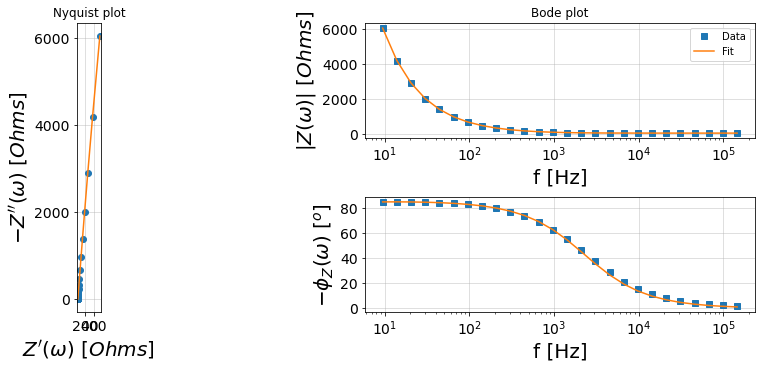


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.23e+01  (+/- 2.95e-01) [Ohm]
     R1 = 6.29e+05  (+/- 3.04e+04) [Ohm]
  CPE1_0 = 3.36e-06  (+/- 3.77e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.53e-01  (+/- 2.44e-04) []



Result of Cycle 30:


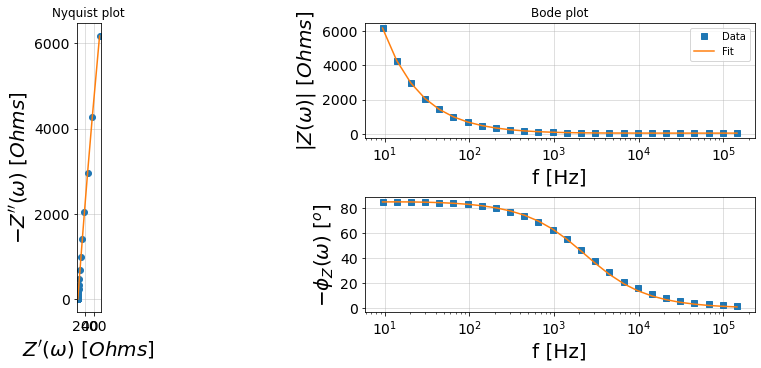


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.22e+01  (+/- 2.74e-01) [Ohm]
     R1 = 5.97e+05  (+/- 2.44e+04) [Ohm]
  CPE1_0 = 3.27e-06  (+/- 3.34e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.54e-01  (+/- 2.22e-04) []



Result of Cycle 31:


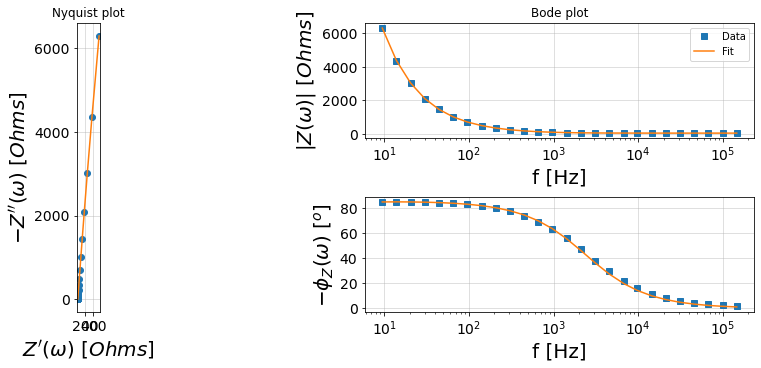


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.22e+01  (+/- 2.84e-01) [Ohm]
     R1 = 6.11e+05  (+/- 2.54e+04) [Ohm]
  CPE1_0 = 3.19e-06  (+/- 3.30e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.55e-01  (+/- 2.25e-04) []



Result of Cycle 32:


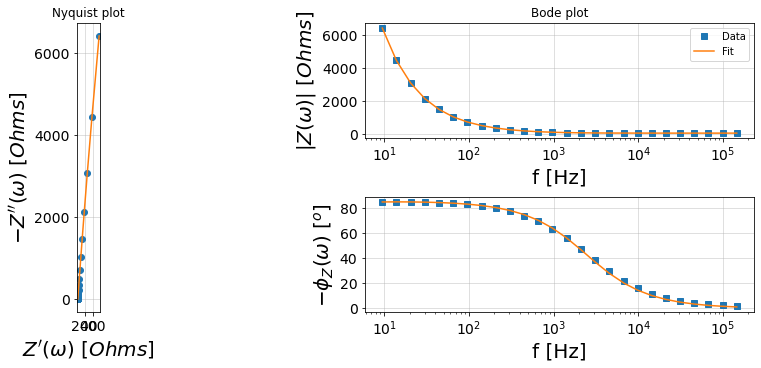


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.19e+01  (+/- 3.27e-01) [Ohm]
     R1 = 5.93e+05  (+/- 2.66e+04) [Ohm]
  CPE1_0 = 3.14e-06  (+/- 3.66e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.55e-01  (+/- 2.54e-04) []



Result of Cycle 33:


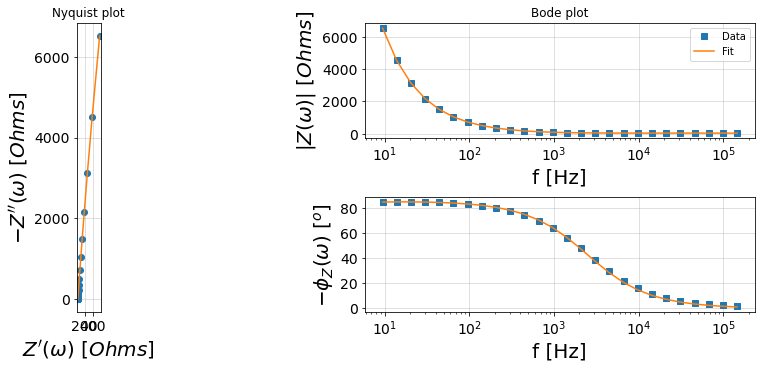


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.19e+01  (+/- 3.23e-01) [Ohm]
     R1 = 4.78e+05  (+/- 1.65e+04) [Ohm]
  CPE1_0 = 3.08e-06  (+/- 3.49e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.56e-01  (+/- 2.47e-04) []



Result of Cycle 34:


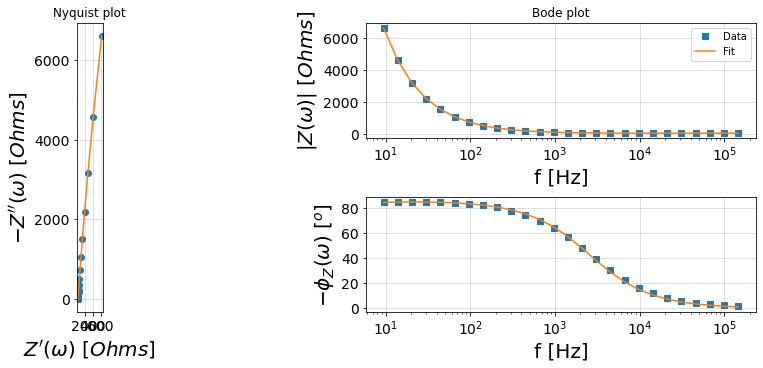


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.17e+01  (+/- 3.50e-01) [Ohm]
     R1 = 3.16e+05  (+/- 7.61e+03) [Ohm]
  CPE1_0 = 3.03e-06  (+/- 3.68e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.56e-01  (+/- 2.64e-04) []



Result of Cycle 35:


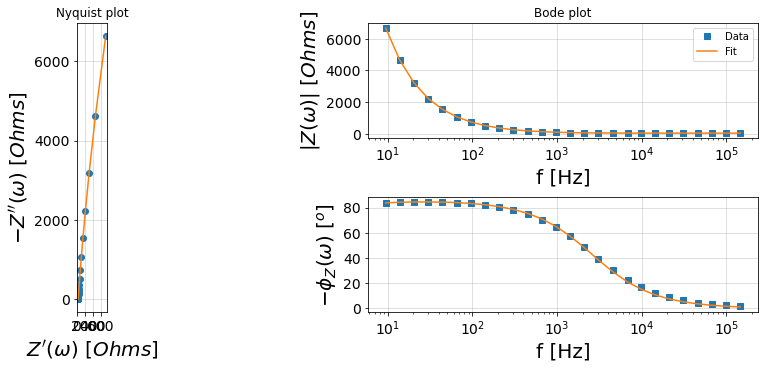


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.16e+01  (+/- 3.08e-01) [Ohm]
     R1 = 1.98e+05  (+/- 2.59e+03) [Ohm]
  CPE1_0 = 3.02e-06  (+/- 3.20e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.55e-01  (+/- 2.31e-04) []



Result of Cycle 36:


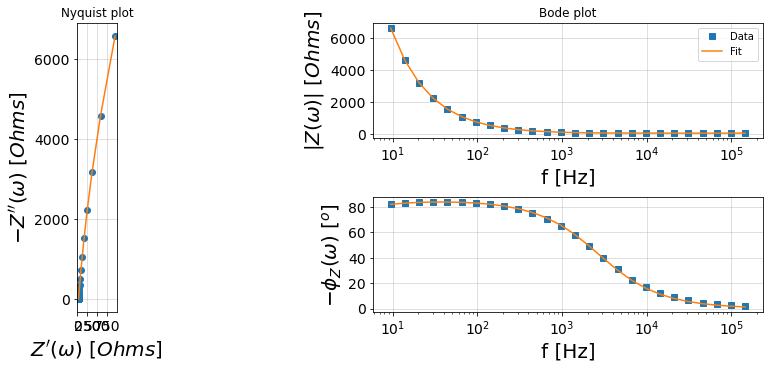


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.09e+01  (+/- 3.93e-01) [Ohm]
     R1 = 1.08e+05  (+/- 9.80e+02) [Ohm]
  CPE1_0 = 3.07e-06  (+/- 4.15e-09) [Ohm^-1 sec^a]
  CPE1_1 = 9.51e-01  (+/- 2.95e-04) []



Result of Cycle 37:


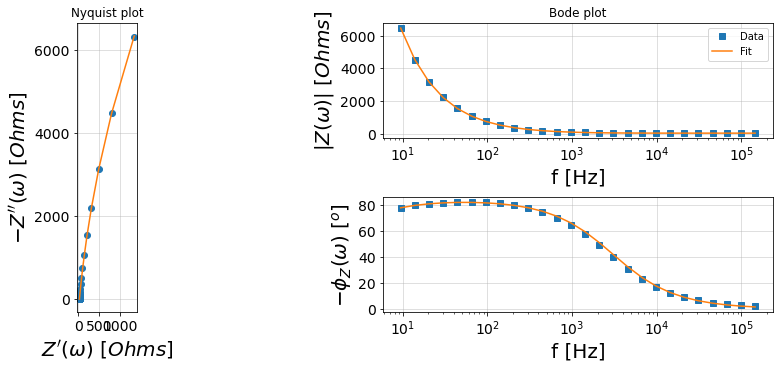


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 2.90e+01  (+/- 1.02e+00) [Ohm]
     R1 = 5.69e+04  (+/- 7.42e+02) [Ohm]
  CPE1_0 = 3.24e-06  (+/- 1.17e-08) [Ohm^-1 sec^a]
  CPE1_1 = 9.42e-01  (+/- 7.81e-04) []



Result of Cycle 38:


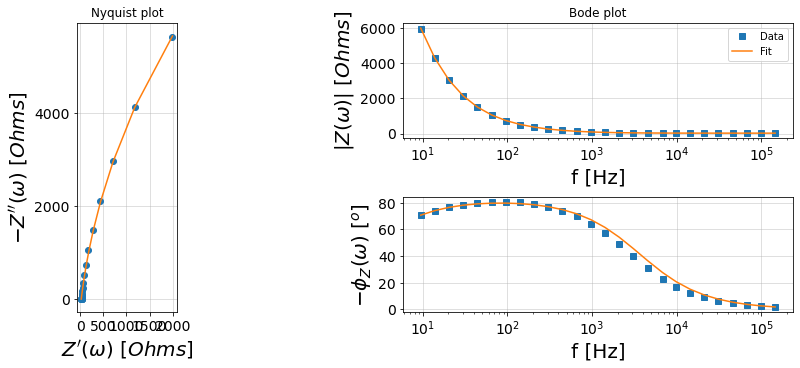


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 2.57e+01  (+/- 2.07e+00) [Ohm]
     R1 = 2.81e+04  (+/- 4.11e+02) [Ohm]
  CPE1_0 = 3.64e-06  (+/- 2.85e-08) [Ohm^-1 sec^a]
  CPE1_1 = 9.24e-01  (+/- 1.67e-03) []



Result of Cycle 39:


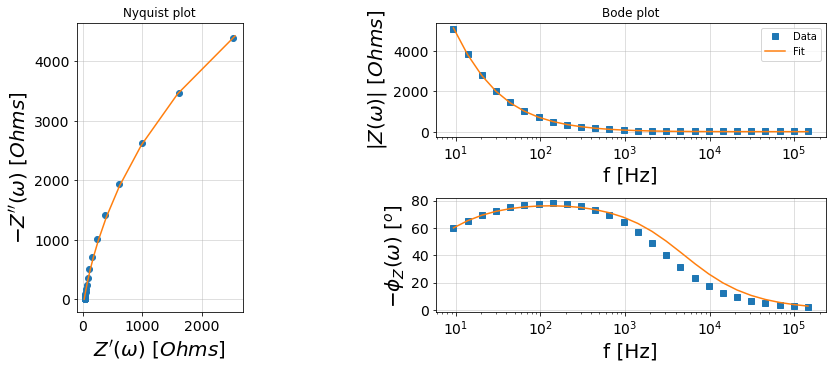


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 2.14e+01  (+/- 3.36e+00) [Ohm]
     R1 = 1.45e+04  (+/- 2.29e+02) [Ohm]
  CPE1_0 = 4.47e-06  (+/- 6.50e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.94e-01  (+/- 3.05e-03) []

Fitting error of parameter R0 at 15.7%




<IPython.core.display.Javascript object>

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist
import pandas as pd
from IPython.core.debugger import set_trace

%notify -m "The fitting has been started!"
for i in range(cycle_start, cycle_end):
    print("Result of Cycle \033[1m" + str(i) + "\033[0m:")
    Z_i = Z[i][cutoff_start:cutoff_end]
    frequency_i = frequencies[i][cutoff_start:cutoff_end]
    model_circuit.fit(frequency_i, Z_i, bounds=model_circuit_bounds)
    
    sp.plot_model_fit_overview(frequency_i, Z_i, model_circuit)
    plt.show()
    print(model_circuit)
    
    errorlist = [0]
    for j in range(len(model_circuit.parameters_)):
        relerror = model_circuit.conf_[j]/model_circuit.parameters_[j]
        errorlist.append(relerror)
        if relerror > 0.1:
            print("Fitting error of parameter " + model_circuit.get_param_names()[0][j] + " at " + str(round(100*relerror, 1)) + "%")
    results.append(model_circuit.parameters_.tolist() + model_circuit.conf_.tolist() + errorlist[1:])
    print("\n")
%notify -m "The fitting has been completed!"

## Wrap data into dataframe and save dataframe as Excel file and HTML report

In [10]:
names, units = model_circuit.get_param_names()
df = pd.DataFrame(data=results, columns=[names + ["Error of " + x for x in names] + ["Rel. Error of " + x for x in names]])

In [11]:
print(df)

           R0            R1    CPE1_0    CPE1_1 Error of R0   Error of R1  \
0   30.000000  1.000000e+03  0.000010  1.000000         NaN           NaN   
1   29.102641  2.444305e+04  0.000026  0.800000    1.536711  4.160883e+03   
2   26.685581  3.241199e+04  0.000023  0.804013    1.230929  4.494564e+03   
3   27.436244  2.829944e+04  0.000018  0.825198    1.039728  2.232248e+03   
4   28.114062  2.874641e+04  0.000015  0.843782    0.904228  1.586921e+03   
5   28.791858  3.404875e+04  0.000013  0.858489    0.711519  1.420742e+03   
6   29.437485  3.962379e+04  0.000011  0.871862    0.528895  1.187818e+03   
7   29.961718  5.013144e+04  0.000010  0.882423    0.363789  1.103905e+03   
8   30.350508  6.524771e+04  0.000009  0.891521    0.292439  1.287913e+03   
9   30.608912  8.705685e+04  0.000008  0.898696    0.245466  1.677970e+03   
10  30.929188  1.207964e+05  0.000007  0.905415    0.161968  1.876613e+03   
11  31.157791  1.488353e+05  0.000007  0.911601    0.163164  2.556131e+03   

In [12]:
#Add voltage steps to the dataframe as first two columns
df.insert(loc = 0, column = "V vs. Ag/AgCl (mV)", value = ["(initial guess)"] + potentials_Ag[cycle_start:cycle_end])
df.insert(loc = 1, column = "V vs. RHE (mV)", value = ["(initial guess)"] + [x+197+59*pot_pH for x in potentials_Ag][cycle_start:cycle_end])

Optional: Calculate real capacitance based on CPE and R values using  C = ( CPE-T * R )(1/CPE-P) / R

In [13]:
if model == "1RCPE":
    df.insert(loc = len(df.columns), column = "C_1 (calculated)", value = [pow((df.loc[i]["CPE1_0"]*df.loc[i]["R1"]), 1/df.loc[i]["CPE1_1"])/df.loc[i]["R1"] for i in range(df.shape[0])])

In [14]:
# Create file directory for the analysis
import os
if not os.path.exists(filename):
    os.makedirs(filename)

In [15]:
# Output to excel
savefile = model + "-Analysis_" + str(int(df.loc[1, "V vs. Ag/AgCl (mV)"].values)) + " - " + str(int(df.loc[1, "V vs. Ag/AgCl (mV)"].values)) + "mV within " + '{:.1e}'.format(lowest_freq) + " - " + '{:.1e}'.format(highest_freq) + "Hz of " + filename
df.to_excel("./" + filename + "//" + savefile + ".xlsx")

In [16]:
# Save notebook output as HTML
os.system('jupyter nbconvert --to html --output "./' + filename + '//' + savefile + '" "SPEIS automated analysis.ipynb"')

0

## Post-analysis and embedded data treatment

In [18]:
%matplotlib notebook
# Create plot for calculated capacitance
fig, ax = plt.subplots()

x = df[1:]["V vs. Ag/AgCl (mV)"].values
y = df[1:]["C_1 (calculated)"].values
sum_error = df[1:]["Rel. Error of CPE1_0"].values.flatten() + df[1:]["Rel. Error of R1"].values.flatten() + df[1:]["Rel. Error of CPE1_1"].values.flatten() / 3
y_error = np.multiply(df[1:]["C_1 (calculated)"].values.flatten(), sum_error)

plt.scatter(x, y)
ax.errorbar(x, y, yerr = y_error, linestyle="None")
plt.ylabel("Capacitance (F)")
plt.xlabel("V vs RHE")
plt.ylim(min(y)*0.9, max(y)*1.1)
fig.set_size_inches(13,8)
plt.title("C1 vs. Potential (V vs. RHE)")
for i in range(df.index[0], df.index[-1]):
    ax.annotate(i+1, (x[i], y[i]))
plt.ion()
plt.show()

<IPython.core.display.Javascript object>

In [19]:
print("Which cycle do you want to fit again?")
inspec_cycle_no = int(input())

model_circuit = CustomCircuit(model_circuit.circuit, initial_guess=model_circuit.initial_guess)
model_circuit.parameters_ = df.iloc[inspec_cycle_no][2:2+len(model_circuit.initial_guess)].values
model_circuit.conf_ = df.iloc[inspec_cycle_no][len(model_circuit.initial_guess)+2:2+2*len(model_circuit.initial_guess)].values
model_circuit.plot(f_data=frequencies[inspec_cycle_no-1][cutoff_start:cutoff_end], Z_data=Z[inspec_cycle_no-1][cutoff_start:cutoff_end], kind="bode")

print(model_circuit)

Which cycle do you want to fit again?
7


<IPython.core.display.Javascript object>


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 3.00e+01 [Ohm]
     R1 = 1.00e+03 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e+00 []

Fit parameters:
     R0 = 3.00e+01  (+/- 3.64e-01) [Ohm]
     R1 = 5.01e+04  (+/- 1.10e+03) [Ohm]
  CPE1_0 = 9.66e-06  (+/- 2.90e-08) [Ohm^-1 sec^a]
  CPE1_1 = 8.82e-01  (+/- 6.33e-04) []

